Exercise 3.4: We will work in a cartesian coordinate system with the origin at the center of the Earth and the z-axis identical with the Earth’s axis. In this system, the magnetic moment of the planet is  
$m = (0, 0, M)$  
• Express components of the magnetic field B = $(B_x,B_y,B_z)$ in cartesian coordinates.  
• What is the value of M if the geomagnetic field at the equator is $3.12 · 10^{−5} T$?

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def bfield(r):
    # The function calculates the geomagnetic field B at the position r0. It works with cartesian coordinates
    # The function uses the following global variables:
    global Re; global q; global m; global mu0; global M;
    
    C = mu0 / (4 * np.pi)
    r_0 = np.sqrt(np.square(r[0])+np.square(r[1])+np.square(r[2]))
    
    B = C * ((3 * r * np.dot(m,r))/pow(r_0, 5) - m/pow(r_0,3))
    return B

In [6]:
def odefun4(q, t):
    ''' 
    This is the input function for the ordinary differential equation solver ode45.
    Input: independent variable t(time), 6-dim vector q
    q = [x,y,z,v_x,v_y,v_z]
    Output: time derivative of q, dqdt = dq/dt
    '''
    
    '''
    In solve.m, we define some global variables. Now, we need to tell
    Matlab, that we will use "m" and "qe"
    '''
    global m; global qe;
    
    '''
    Now, we define position and velocity variables using the vector of dependent variables, q.
    This would not be necessary but using "x" instead of q(1), etc.. makes the code
    below more readable
    '''
    
    x = q[0]
    y = q[1]
    z = q[2]
    vx = q[3]
    vy = q[4]
    vz = q[5]
    
    # The electric field is zero here
    Ex = 0
    Ey = 0
    Ez = 0
    
    '''
    The magnetic field is now calculated using another function, bfield(r) which is a function of
    position. The function is stored in bfield.m
    '''
    r0 = np.array([q[1], q[2], q[3]])     # The position vector
    B = bfield(r0)                       # the function returns a vector B and we use
    # this vector to define our componentwise B-field variables
                   
    Bx = B[0]
    By = B[1]
    Bz = B[2]
    
    # Now, we calculate the components of the 6-dim vector dq/dtd
    dxdt = vx
    dydt = vy
    dzdt = vz
    dyxdt = qe/m*(Ex + vy*Bz - vz*Bx)
    dvydt = qe/m*(Ey + vz*Bx - vx*Bz)
    dvzdt = qe/m*(Ez + vx*By - vy*Bx)
    
    '''
    Finally, we have to assign the calculated components to the vector variable dqdt, which is
    the output of the function
    '''
    dqdt = [dxdt, dydt, dzdt, dyxdt, dvydt, dvzdt]
    
    return dqdt

Text(0.5, 0.92, 'Proton trajectory, E = 50 MeV, t_i=0 s, t_f=20 s')

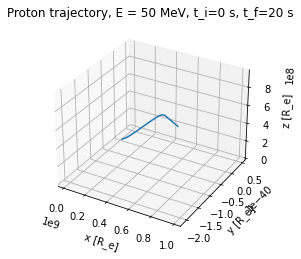

In [47]:
from scipy import integrate as itg

'''
This matlab script solves the equation of motion for a charged particle in Earth's magnetic field.
To make the program run faster, we will define all our constants as global variables
'''

global Re; global m; global qe; global mu0; global M;
Re = 6378137     # Earth's radius
m = 1.627e-27    # Particle mass in kg
qe = 1.602e-19   # particle charge in Coulomb
esc = 1          # Earth scale - for plotting
c = 299792458    # Speed of light in m/s
mu0 = 4 * np.pi * 1e-7  # Vacuum permeability
M = 7.94e22      # Earth's magnetic moment

# Initial conditions for position
# Defined in spherical coordinates for convenience
r0 = 3*Re
phi0 = 0
theta0 = np.pi / 2
# and transformed to cartesian
x0 = r0 * np.sin(theta0) * np.cos(phi0)
y0 = r0 * np.sin(theta0)* np.sin(phi0) 
z0 = r0 * np.cos(theta0)

# Initial conditions for velocity defined using particle energy and two angles
Ek_eV = 5e7
Ek = Ek_eV*1.602e-19
v_r0 = c*pow(((1+m*pow(c,2)/Ek)),-0.5) 
v_phi0 = 0
v_theta0 = np.pi/4 

# Coordinate transform for velocity.
vx0 = v_r0*np.sin(v_theta0)*np.cos(v_phi0)
vy0 = v_r0*np.sin(v_theta0)*np.sin(v_phi0)
vz0 = v_r0*np.cos(v_theta0)

# Defining the vector of initial conditions
q0 = np.array([x0,y0,z0,vx0,vy0,vz0])

# Defining the time interval
ti = 0      # initial time in seconds
tf = 20     # final time in seconds
N = 10000   # number of steps
timespan = np.linspace(ti,tf,N)

# Solving the ODE. 
# Please note that odefun(t,q) is different from Program 1
res = itg.odeint(odefun4, q0 , timespan)

# Having solved the equation, the data has to be plotted.
# It is not necessary to understand what each of the commands 
# below does.

h = plt.figure     # We set create a new figure. We did not have to do this
# in Program 1 because we were plotting only one curve. When plotting more 
# curves into the same figure, you should create it explicitly.

# The following set of commands plots the magnetic lines of force.
# [Adapted from MagLForce script by  Abdulwahab Abokhodair (2005)]
n = 4
d2r = np.pi/180
r2d=1/d2r
tht = d2r*np.ogrid[0:5:360]
phi = d2r*np.ogrid[0:np.ceil(180/n):180]
hh = phi*r2d
A = r0
r= A*pow(np.sin(tht),2)
rho=r*np.sin(tht)
x=rho*np.cos(phi)
y=rho*np.sin(phi)


# Finally, we plot the particle trajectory and add labels to axes.
ax = plt.axes(projection='3d')
ax.plot3D([i[0] for i in res], [i[1] for i in res], [i[2] for i in res])

#set(gca,'FontSize',18) # sets font size
ax.set_xlabel('x [R_e]') # sets title of x-axis
ax.set_ylabel('y [R_e]') # sets title of y-axis
ax.set_zlabel('z [R_e]') # sets title of z-axis
ax.set_title('Proton trajectory, E = 50 MeV, t_i='+ str(ti) + ' s, t_f='+ str(tf) + ' s') # sets figure title

# print -dpng -r200 ('ProtonMagField.png') # prints the figure to file
# using the png format with 200 dpi resolution.